In [1]:
pip install pycountry_convert

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ast 

import numpy as np
import pandas as pd

import pycountry_convert as pcc
import pycountry as pc

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#from tqdm import tqdm
from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
#tqdm.pandas()

c = sns.color_palette('rocket_r', 7)
sns.color_palette('rocket_r', 7);

### Get the data

In [3]:
drive_download = 'https://drive.google.com/uc?export=download&id=1Pv3UEG5Bd6COm8QnwhGebNQJAtvXAwQx'
castaways_df = pd.read_csv(drive_download, index_col=0 , parse_dates=['date'])
castaways_df['year'] = [i.year for i in castaways_df['date'].dt.date]

### Modify known erroneous dates

In [4]:
#Remove leading + sign in the date of birth
castaways_df['date_of_birth'] = castaways_df['date_of_birth'].str.replace('+', '', regex=True)
#Remove erroneous date formats 1901-00-00 for loc[3245 & 49]
castaways_df.loc[castaways_df['date_of_birth'].str.contains('-00-00') == True, 'date_of_birth'] = ''
castaways_df[48:49]

,date,name,wiki_link,link,profession,gender_wiki,country_of_citizenship,place_of_birth,country_of_birth,date_of_birth,year
castaway_ref_wiki,,,,,,,,,,,
49,1945-01-09,Joan Edgar,https://en.wikipedia.org/wiki/Joan_Edgar,NaN,"['radio personality', 'presenter', 'creator', ...",female,NaN,NaN,NaN,,1945


In [5]:
castaways_df[3159:3160]

,date,name,wiki_link,link,profession,gender_wiki,country_of_citizenship,place_of_birth,country_of_birth,date_of_birth,year
castaway_ref_wiki,,,,,,,,,,,
3160,2018-11-02,Chi-chi Nwanoku,https://en.wikipedia.org/wiki/Chi-chi_Nwanoku,http://www.bbc.co.uk/programmes/b09r3qty,"['musician', 'artist', 'professional']",female,United Kingdom,Fulham,United Kingdom,1956-06-00,2018


In [6]:
# Replace the erroneous date formats 1956-06-00 loc[3160] with 1956-06-01
castaways_df['date_of_birth'] = castaways_df['date_of_birth'].str.replace('-00', '-01', regex=True)
castaways_df[3159:3160]

,date,name,wiki_link,link,profession,gender_wiki,country_of_citizenship,place_of_birth,country_of_birth,date_of_birth,year
castaway_ref_wiki,,,,,,,,,,,
3160,2018-11-02,Chi-chi Nwanoku,https://en.wikipedia.org/wiki/Chi-chi_Nwanoku,http://www.bbc.co.uk/programmes/b09r3qty,"['musician', 'artist', 'professional']",female,United Kingdom,Fulham,United Kingdom,1956-06-01,2018


In [7]:
#Convert to datetime format
castaways_df['date_of_birth'] =  pd.to_datetime(castaways_df['date_of_birth'], format='%Y-%m-%d')
castaways_df[3159:3160]

,date,name,wiki_link,link,profession,gender_wiki,country_of_citizenship,place_of_birth,country_of_birth,date_of_birth,year
castaway_ref_wiki,,,,,,,,,,,
3160,2018-11-02,Chi-chi Nwanoku,https://en.wikipedia.org/wiki/Chi-chi_Nwanoku,http://www.bbc.co.uk/programmes/b09r3qty,"['musician', 'artist', 'professional']",female,United Kingdom,Fulham,United Kingdom,1956-06-01,2018


In [8]:
#Get the year of birth only
castaways_df['age'] = castaways_df['year']-pd.DatetimeIndex(castaways_df['date_of_birth']).year
castaways_df[3159:3160]

,date,name,wiki_link,link,profession,gender_wiki,country_of_citizenship,place_of_birth,country_of_birth,date_of_birth,year,age
castaway_ref_wiki,,,,,,,,,,,,
3160,2018-11-02,Chi-chi Nwanoku,https://en.wikipedia.org/wiki/Chi-chi_Nwanoku,http://www.bbc.co.uk/programmes/b09r3qty,"['musician', 'artist', 'professional']",female,United Kingdom,Fulham,United Kingdom,1956-06-01,2018,62.0


In [9]:
# Bin age groups into 10 year gaps
bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
binlab=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
agegroup_df=castaways_df.copy()
agegroup_df['count'] = 1
agegroup_df['age_group'] = pd.cut(agegroup_df.age, bins, labels=binlab)#['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
agegroup_df.pivot_table('count', index='year', columns='age_group', aggfunc='sum')

age_group,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
year,,,,,,,,,,
1942,0,0,3,2,8,2,4,0,0,0
1943,0,0,0,3,4,4,0,0,0,0
1944,0,0,1,2,1,0,1,0,0,0
1945,0,2,3,8,3,1,0,0,0,0
1946,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2017,0,0,1,0,14,8,12,4,3,0
2018,0,0,2,1,9,9,9,4,3,0
2019,0,0,0,2,9,11,7,4,1,0


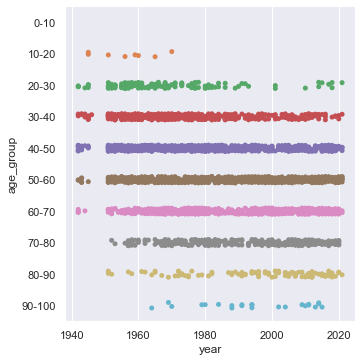

In [10]:
# Plot in seaborn
agegroup_df.dtypes
sns.catplot(x="year", y="age_group", data=agegroup_df)

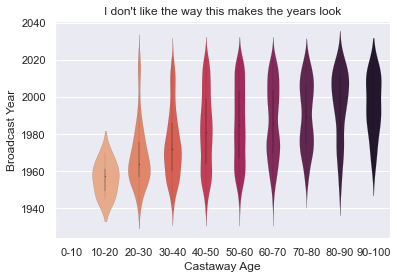

In [11]:
# Make a violin plot of the data
vp=sns.violinplot(x="age_group", y="year", data=agegroup_df, palette=sns.color_palette('rocket_r', 10),linewidth=0.1)
vp.set_title("I don't like the way this makes the years look")
vp.set_ylabel("Broadcast Year")
vp.set_xlabel("Castaway Age")
#vp.set_xticklabels(['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
plt.show()

In [12]:
# Work out the percentages in each age range
a=agegroup_df['age_group'].value_counts(normalize=True)*100
#plt.pie(a)
print(a.dtypes)

float64


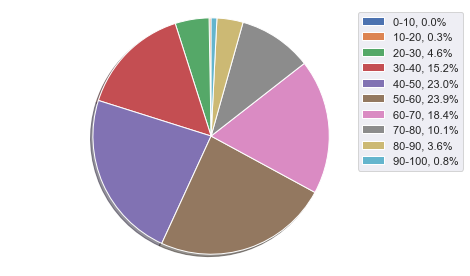

In [13]:
# Show the fractions of each age group
modbins = pd.cut(castaways_df['age'],bins,labels=binlab)
pieop=castaways_df.groupby(modbins)['age'].agg(['count'])
fig1, ax1 = plt.subplots()
ax1.pie(pieop['count'], shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
countpercent=pieop['count'].sum()
piepercent=(pieop['count']/countpercent)*100
labels = [f'{l}, {s:0.1f}%' for l, s in zip(binlab, piepercent)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

In [14]:
#pieop.plot(x ='age', y='count', kind = 'scatter')
#plt.show()

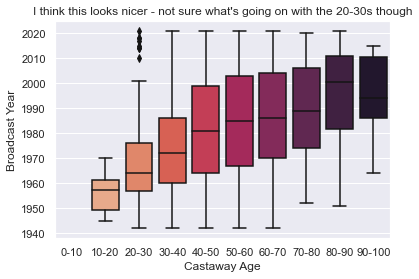

In [15]:
# Make a box plot of the data
bp=sns.boxplot(x="age_group", y="year", data=agegroup_df, palette=sns.color_palette('rocket_r', 10))
bp.set_title("I think this looks nicer - not sure what's going on with the 20-30s though")
bp.set_ylabel("Broadcast Year")
bp.set_xlabel("Castaway Age")
plt.show()

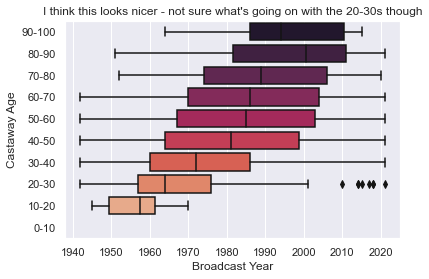

In [16]:
# Make a box plot of the data
bp=sns.boxplot(x="year", y="age_group", data=agegroup_df, palette=sns.color_palette('rocket_r', 10))
bp.set_title("I think this looks nicer - not sure what's going on with the 20-30s though")
bp.set_xlabel("Broadcast Year")
bp.set_ylabel("Castaway Age")
# Show age ranges ascending instead of descending
bp.set_ylim(bp.get_ylim()[::-1])
plt.show()

In [17]:
# Get the age distribution of the castaways for each decade of broadcast
# Bin broadcast decades
year_bins=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]#np.inf]
yearbinlabels=["'40s","'50s","'60s","'70s","'80s","'90s","'00s","'10s","'20s"]
bygroup_df=castaways_df.copy()
bygroup_df['count'] = 1
bygroup_df['year_group'] = pd.cut(bygroup_df.year, year_bins,labels=yearbinlabels)
bygroup_df.pivot_table('count',index='age', columns='year_group', aggfunc='sum')

year_group,'40s,'50s,'60s,'70s,'80s,'90s,'00s,'10s,'20s
age,,,,,,,,,
13.0,0,0,1,0,0,0,0,0,0
18.0,0,1,0,0,0,0,0,0,0
19.0,0,1,1,0,0,0,0,0,0
20.0,2,2,0,0,0,0,0,0,0
21.0,1,4,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
96.0,0,0,0,0,0,1,0,0,0
97.0,0,0,0,1,2,0,0,0,0
98.0,0,0,0,0,0,0,0,1,0


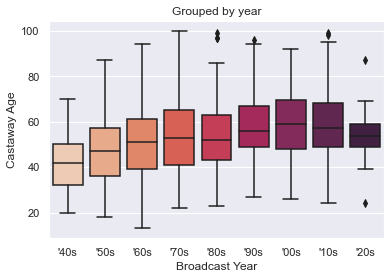

In [18]:
# Make a box plot of the data
ybp=sns.boxplot(x="year_group", y="age", data=bygroup_df, palette=sns.color_palette('rocket_r', 10))
ybp.set_title("Grouped by year")
ybp.set_xlabel("Broadcast Year")
ybp.set_ylabel("Castaway Age")
plt.show()

### Oldest and youngest castaways - brief summary

In [19]:
def oldest_youngest(df):
    # Identify the oldest and youngest castaways
    youngest=df.loc[df['age'].idxmin()]
    oldest=df.loc[df['age'].idxmax()]
    
    # Find all under 20 years old and all over 95 years old
    teenagers=df[df['age'].lt(20)].index
    elders=df[df['age'].gt(95)].index
    
    
    # Print out the results
    print("The youngest castaway was", youngest['name'], "who was castaway in", youngest['year'], "at age {:0.0f}.".format(youngest['age']), end=" ")
    print("The oldest castaway was", oldest['name'], "who was castaway in", oldest['year'], "at age {:0.0f}.".format(oldest['age']))
    print("---")
    print("There have been", len(teenagers), "teenaged castaways;")
    for x in teenagers:
        print(castaways_df.loc[x]['name'], "({:0.0f})".format(castaways_df.loc[x]['age']))
    print("---")
    print("There have been", len(elders), "castaways over the age of 95;" )
    for x in elders:
        print(castaways_df.loc[x]['name'], "({:0.0f})".format(castaways_df.loc[x]['age']))

In [20]:
oldest_youngest(castaways_df)

The youngest castaway was Quentin Poole who was castaway in 1970 at age 13. The oldest castaway was Sir Robert Mayer who was castaway in 1979 at age 100.
---
There have been 4 teenaged castaways;
Petula Clark (19)
Janette Scott (18)
Hayley Mills (19)
Quentin Poole (13)
---
There have been 8 castaways over the age of 95;
Sir Robert Mayer (100)
Commissioner Catherine Bramwell-Booth (97)
George Abbott (97)
Gwen Ffrangcon-Davies (97)
Athene Seyler (99)
Kathleen Hale (96)
Jeremy Hutchinson (98)
Harry Rabinowitz (99)


### Split castaways by gender

In [35]:
# Get male and female castaways
mf_df=castaways_df.copy()
f_df = mf_df.loc[mf_df['gender_wiki'].isin(['female', 'transgender female'])]
m_df = mf_df.loc[mf_df['gender_wiki'].isin(['male', 'transgender male'])]
unknown_df=mf_df.loc[~mf_df['gender_wiki'].isin(['male', 'female','transgender male','transgender female'])]
print(unknown_df.shape[0])
unknown_df.head()

343


,date,name,wiki_link,link,profession,gender_wiki,country_of_citizenship,place_of_birth,country_of_birth,date_of_birth,year,age
castaway_ref_wiki,,,,,,,,,,,,
7,1942-12-03,Captain A E Dingle,https://en.wikipedia.org/wiki/A._E._Dingle,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1942,NaN
9,1942-03-26,Reverend Canon W H Elliott,https://en.wikipedia.org/wiki/W_H_Elliott,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1942,NaN
17,1942-07-23,Leslie Howard,https://en.wikipedia.org/wiki/Leslie_Howard_(a...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1942,NaN
19,1942-08-20,Barrington Dalby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1942,NaN
24,1942-10-24,Michael Powell,https://en.wikipedia.org/wiki/Michael_Powell_(...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1942,NaN


In [75]:
def gender_caveat(m_df, f_df, u_df):
    m=m_df.shape[0]
    f=f_df.shape[0]
    u=u_df.shape[0]
    tot=m+f+u
    mpc=(m/(m+f))*100
    fpc=100-mpc
    av_m_age=m_df['age'].mean()
    av_f_age=f_df['age'].mean()
    print(f'Of the {tot} castaways recorded, the genders of {u} are unknown. Of the remaining {m+f} castaways, '
         f'{round(mpc,2)}% are male and {round(fpc,2)}% are female. The average age of the male castaways is '
         f'{round(av_m_age,1)} and the average age of the female castaways is {round(av_f_age,1)}')

In [76]:
gender_caveat(m_df, f_df, unknown_df)

Of the 3294 castaways recorded, the genders of 343 are unknown. Of the remaining 2951 castaways, 68.93% are male and 31.07% are female. The average age of the male castaways is 53.8 and the average age of the female castaways is 54.2


In [22]:
# Bin age groups into 10 year gaps
# Female castaways
fage_df=f_df.copy()
fage_df['count'] = 1
fage_df['age_group'] = pd.cut(fage_df.age, bins, labels=binlab)
fage_df.pivot_table('count', index='year', columns='age_group', aggfunc='sum')
# Male castaways
mage_df=m_df.copy()
mage_df['count'] = 1
mage_df['age_group'] = pd.cut(mage_df.age, bins, labels=binlab)
mage_df.pivot_table('count', index='year', columns='age_group', aggfunc='sum')

age_group,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
year,,,,,,,,,,
1942,0,0,2,2,6,2,4,0,0,0
1943,0,0,0,3,3,4,0,0,0,0
1944,0,0,1,1,1,0,0,0,0,0
1945,0,1,0,4,2,1,0,0,0,0
1951,0,0,1,7,10,6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
2017,0,0,1,0,7,4,7,1,1,0
2018,0,0,2,0,5,3,7,2,0,0
2019,0,0,0,1,9,6,2,1,1,0


In [23]:
# Get the age distribution of the castaways for each decade of broadcast
# Female Castaways
fbygroup_df=f_df.copy()
fbygroup_df['count'] = 1
fbygroup_df['year_group'] = pd.cut(bygroup_df.year, year_bins,labels=yearbinlabels)
fbygroup_df.pivot_table('count',index='age', columns='year_group', aggfunc='sum')
# Male Castaways
mbygroup_df=m_df.copy()
mbygroup_df['count'] = 1
mbygroup_df['year_group'] = pd.cut(bygroup_df.year, year_bins,labels=yearbinlabels)
mbygroup_df.pivot_table('count',index='age', columns='year_group', aggfunc='sum')

year_group,'40s,'50s,'60s,'70s,'80s,'90s,'00s,'10s,'20s
age,,,,,,,,,
13.0,0,0,1,0,0,0,0,0,0
20.0,1,1,0,0,0,0,0,0,0
21.0,0,2,1,0,0,0,0,0,0
22.0,0,0,0,2,0,0,0,0,0
23.0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,1,0
97.0,0,0,0,0,1,0,0,0,0
98.0,0,0,0,0,0,0,0,1,0


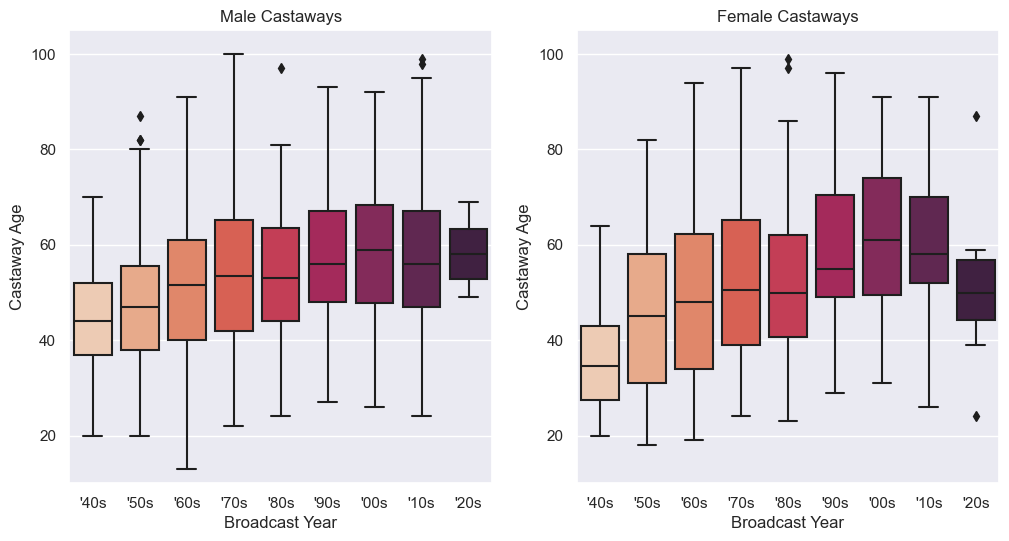

In [24]:
fig=plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
mybp=sns.boxplot(x="year_group", y="age", data=mbygroup_df, palette=sns.color_palette('rocket_r', 10))
mybp.set_title("Male Castaways")
mybp.set_xlabel("Broadcast Year")
mybp.set_ylabel("Castaway Age")
mybp.set_ylim(10,105)
plt.subplot(1, 2, 2)
fybp=sns.boxplot(x="year_group", y="age", data=fbygroup_df, palette=sns.color_palette('rocket_r', 10))
fybp.set_title("Female Castaways")
fybp.set_xlabel("Broadcast Year")
fybp.set_ylabel("Castaway Age")
fybp.set_ylim(10,105)
plt.show()

In [78]:
nmale=mage_df.shape[0]
nfemale=fage_df.shape[0]
mage_df.head()

,date,name,wiki_link,link,profession,gender_wiki,country_of_citizenship,place_of_birth,country_of_birth,date_of_birth,year,age,count,age_group
castaway_ref_wiki,,,,,,,,,,,,,,
1,1942-01-29,Vic Oliver,https://en.wikipedia.org/wiki/Vic_Oliver,NaN,"['actor', 'performing artist', 'artist', 'prof...",male,Austria-Hungary,Vienna,Austria,1898-07-08,1942,44.0,1,40-50
2,1942-05-02,James Agate,https://en.wikipedia.org/wiki/James_Agate,NaN,"['journalist', 'media professional', 'professi...",male,United Kingdom,NaN,NaN,1877-09-09,1942,65.0,1,60-70
3,1942-12-02,Commander A B Campbell,https://en.wikipedia.org/wiki/A._B._Campbell,NaN,[],male,NaN,Peckham,United Kingdom,1881-01-21,1942,61.0,1,60-70
4,1942-02-19,C B Cochran,https://en.wikipedia.org/wiki/Charles_B._Cochran,NaN,"['actor', 'performing artist', 'artist', 'prof...",male,United Kingdom,NaN,NaN,1872-09-25,1942,70.0,1,60-70
6,1942-05-03,Jack Hylton,https://en.wikipedia.org/wiki/Jack_Hylton,NaN,"['bandleader', 'musician', 'artist', 'professi...",male,United Kingdom,Bolton,United Kingdom,1892-07-02,1942,50.0,1,40-50


<AxesSubplot:>

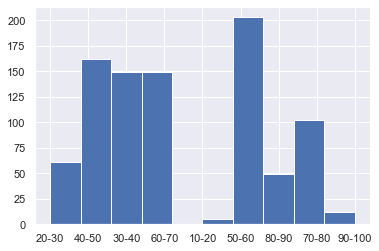

In [92]:
fage_df['age_group'].hist()
#df['N'].hist(by=df['Letter'])

<AxesSubplot:>

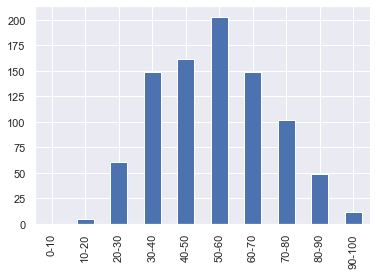

In [98]:
# Plot the distribution of ages of the female castaways
fage_df.age_group.value_counts().loc[binlab].plot.bar()

<AxesSubplot:>

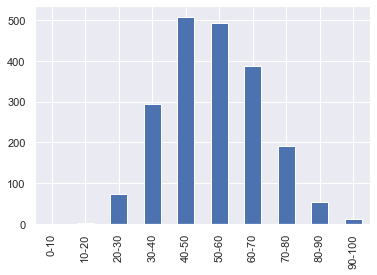

In [96]:
mage_df.age_group.value_counts().loc[binlab].plot.bar()